# What is tempogram

Tempo can vary locally within a piece. Therefore, tempogram was introduce as a feature matrix which indicates the prevalence of certain tempi at each moment in time.

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
song = r'C:\Users\Mahip\Documents\songdata\unlugged\Slow Dancing in a Burning Room.mp3'

In [4]:
y, sr = librosa.load(song, duration = 20)

In [11]:
ipd.Audio(y, rate=sr)

In [5]:
hop_length = 200 # samples per frame
onset_env = librosa.onset.onset_strength(y, sr=sr, hop_length=hop_length, n_fft=2048)

In [6]:
frames = range(len(onset_env))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

Text(0.5, 1.0, 'Novelty Function')

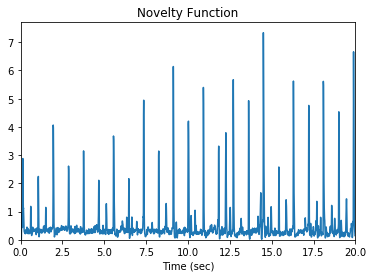

In [8]:
plt.plot(t, onset_env)
plt.xlim(0, t.max())
plt.ylim(0)
plt.xlabel('Time (sec)')
plt.title('Novelty Function') # novelty function is the onset envolope

## Actual meaning of tempogram: 

librosa.feature.tempogram implements an autocorrelation tempogram, a short-time autocorrelation of the (spectral) novelty function.

## Librosa.beat.tempo: It denotes the global tempo

In [12]:
tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr, hop_length=hop_length, win_length=400)

## tempogram is always calculated on onset_evolope 

In [13]:
tempogram.shape

(400, 2206)

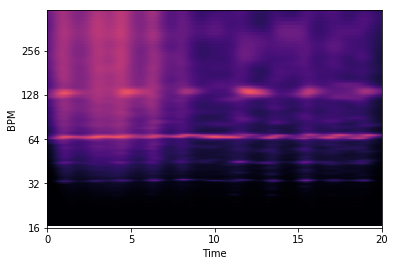

In [14]:
librosa.display.specshow(tempogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='tempo')

## estimating global tempo

In [17]:
tempo = librosa.beat.tempo(y, sr=sr)
print (tempo)

[66.25600962]
